# 28th Sept

In [18]:
import tweepy
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from tweepy.auth import OAuthHandler
import csv

In [2]:
path = r'/home/edmundotome/Documents/Github Projects/LogAPItwitter.csv'
log = pd.read_csv(path)

In [3]:
consumerKey = log['API Key'][0]
consumerSecret = log['API Key Secret'][0]

accessToken = log['Access Token'][0]
accessTokenSecret = log['Access Token Secret'][0]

In [4]:
auth = OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
#gather 1000 tweets about Bitcoin and filter out any retweets 'RT'
search_term = '#bitcoin -filter:retweets'

#create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since='2021-09-28', tweet_mode='extended').items(1000)

#store tweets in a variable and get the full text
all_tweets = [tweet.full_text for tweet in tweets]

In [6]:
#create a dataframe to store the tweets with a column called 'tweets'
df = pd.DataFrame(all_tweets, columns=['Tweets'])
#show the first 5 rows of data
df.head(10)

,Tweets
0,#linkedin #twitter #facebook #discounts #insta...
1,"@WatcherGuru #Biconomy is the ONLY EXCHANGE, p..."
2,#linkedin #twitter #facebook #discounts #insta...
3,#linkedin #twitter #facebook #discounts #insta...
4,#linkedin #twitter #facebook #discounts #insta...
5,@BluesparrowC @NatashaCryptoUS 🐦🐦🐦🐦🐦🐦🐦🐦🐦🐦\n\n ...
6,"@TheMoonCarl Yea, #Bitcoin is King 👑 🚀🚀🚀"
7,Newly minted piece. #AAPES #PolygonNFT #Polygo...
8,"3. Find the #Bitcoin daily transaction counts,..."
9,Have you noticed how noone wants to sell their...


In [7]:
#create a function to clean the tweets 
def cleanTwt(twt):
  twt = re.sub('#bitcoin', 'bitcoin', twt) #removes the '#' from bitcoin
  twt = re.sub('#Bitcoin', 'Bitcoin', twt)
  twt = re.sub('#BTC', 'Bitcoin', twt)
  twt = re.sub('#[A-Za-z0-9]+', '', twt) #removes any strings with a '#'
  twt = re.sub('\\n', '', twt) #removes the '\n' string
  twt = re.sub('https?:\/\/\S+', '', twt) #removes any hyperlinks
  return twt

In [8]:
#clean the tweets
df['Cleaned Tweets'] = df['Tweets'].apply(cleanTwt)
#show the dataset
df.head()

,Tweets,Cleaned Tweets
0,#linkedin #twitter #facebook #discounts #insta...,bitcoin on orders over $99
1,"@WatcherGuru #Biconomy is the ONLY EXCHANGE, p...","@WatcherGuru is the ONLY EXCHANGE, paying div..."
2,#linkedin #twitter #facebook #discounts #insta...,bitcoin Enjoy $10 off Orders ...
3,#linkedin #twitter #facebook #discounts #insta...,bitcoin on purchases over $25...
4,#linkedin #twitter #facebook #discounts #insta...,bitcoin SAVE BIG ON AIRPORT P...


In [9]:
#create a function to get subjetivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#create a function to get polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#create two new columns called 'Subjetivity' and 'Polarity'
df['Subjetivity'] = df['Cleaned Tweets'].apply(getSubjectivity)

df['Polarity'] = df['Cleaned Tweets'].apply(getPolarity)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity
0,#linkedin #twitter #facebook #discounts #insta...,bitcoin on orders over $99,0.000000,0.000000
1,"@WatcherGuru #Biconomy is the ONLY EXCHANGE, p...","@WatcherGuru is the ONLY EXCHANGE, paying div...",1.000000,0.000000
2,#linkedin #twitter #facebook #discounts #insta...,bitcoin Enjoy $10 off Orders ...,0.500000,0.400000
3,#linkedin #twitter #facebook #discounts #insta...,bitcoin on purchases over $25...,0.000000,0.000000
4,#linkedin #twitter #facebook #discounts #insta...,bitcoin SAVE BIG ON AIRPORT P...,0.100000,0.000000
5,@BluesparrowC @NatashaCryptoUS 🐦🐦🐦🐦🐦🐦🐦🐦🐦🐦\n\n ...,@BluesparrowC @NatashaCryptoUS 🐦🐦🐦🐦🐦🐦🐦🐦🐦🐦 ...,0.200000,0.100000
6,"@TheMoonCarl Yea, #Bitcoin is King 👑 🚀🚀🚀","@TheMoonCarl Yea, Bitcoin is King 👑 🚀🚀🚀",0.000000,0.000000
7,Newly minted piece. #AAPES #PolygonNFT #Polygo...,Newly minted piece. Bitcoin .@open...,0.454545,0.136364
8,"3. Find the #Bitcoin daily transaction counts,...","3. Find the Bitcoin daily transaction counts, ...",0.187500,0.000000
9,Have you noticed how noone wants to sell their...,Have you noticed how noone wants to sell their...,0.291667,0.175000


In [10]:
#create a function to get sentiment text 
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


In [11]:
#create a column to store the text sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity,Sentiment
0,#linkedin #twitter #facebook #discounts #insta...,bitcoin on orders over $99,0.000000,0.000000,Neutral
1,"@WatcherGuru #Biconomy is the ONLY EXCHANGE, p...","@WatcherGuru is the ONLY EXCHANGE, paying div...",1.000000,0.000000,Neutral
2,#linkedin #twitter #facebook #discounts #insta...,bitcoin Enjoy $10 off Orders ...,0.500000,0.400000,Positive
3,#linkedin #twitter #facebook #discounts #insta...,bitcoin on purchases over $25...,0.000000,0.000000,Neutral
4,#linkedin #twitter #facebook #discounts #insta...,bitcoin SAVE BIG ON AIRPORT P...,0.100000,0.000000,Neutral
5,@BluesparrowC @NatashaCryptoUS 🐦🐦🐦🐦🐦🐦🐦🐦🐦🐦\n\n ...,@BluesparrowC @NatashaCryptoUS 🐦🐦🐦🐦🐦🐦🐦🐦🐦🐦 ...,0.200000,0.100000,Positive
6,"@TheMoonCarl Yea, #Bitcoin is King 👑 🚀🚀🚀","@TheMoonCarl Yea, Bitcoin is King 👑 🚀🚀🚀",0.000000,0.000000,Neutral
7,Newly minted piece. #AAPES #PolygonNFT #Polygo...,Newly minted piece. Bitcoin .@open...,0.454545,0.136364,Positive
8,"3. Find the #Bitcoin daily transaction counts,...","3. Find the Bitcoin daily transaction counts, ...",0.187500,0.000000,Neutral
9,Have you noticed how noone wants to sell their...,Have you noticed how noone wants to sell their...,0.291667,0.175000,Positive


/home/edmundotome/anaconda3/envs/Signal-Processing/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


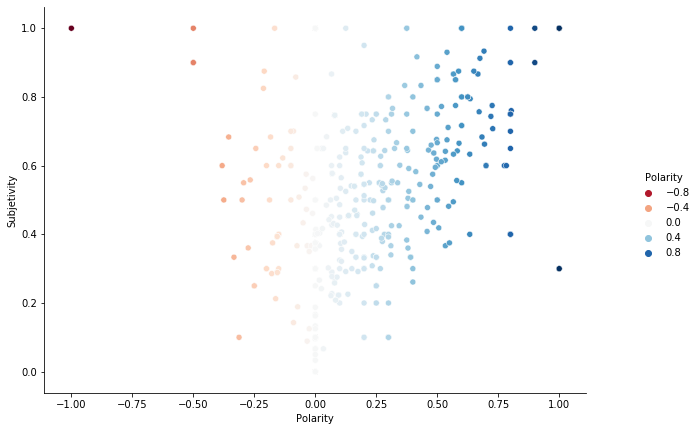

In [12]:
ax = sns.relplot(df['Polarity'], df['Subjetivity'], hue = df['Polarity'], palette='RdBu')
ax.fig.set_size_inches(10,6)

norm = plt.Normalize(df['Polarity'].min(), df['Polarity'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])

plt.show()

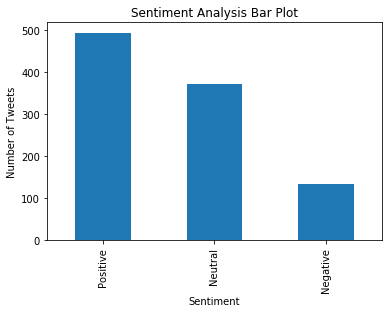

In [13]:
#create a barchar to show the count of positive, neutral and negative sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [14]:
df['Sentiment'].value_counts()

Positive    494
Neutral     372
Negative    134
Name: Sentiment, dtype: int64

In [15]:
val_count = list(df['Sentiment'].value_counts())
val_count

[494, 372, 134]

In [16]:
lst_df = list(df['Sentiment'].value_counts())
lst_df

[494, 372, 134]

In [19]:
header = ['Sentiment', 'Positive', 'Neutral', 'Negative']
with open('r_sentiments.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    # write the header
    writer.writerow(header)

In [20]:
dfs = pd.read_csv("r_sentiments.csv")
  
# updating the column value/data
dfs.loc[0, 'Sentiment'] = 'day 1'
dfs.loc[0, 'Positive'] = lst_df[0]
dfs.loc[0, 'Neutral'] = lst_df[1]
dfs.loc[0, 'Negative'] = lst_df[2]
  
# writing into the file
dfs.to_csv("r_sentiments.csv", index=False)
  
print(dfs)

  Sentiment Positive Neutral Negative
0     day 1      494     372      134
